In [1]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
import datetime
from datetime import date, time
import yfinance as yf
from yahoofinancials import YahooFinancials
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from math import sqrt  
from sklearn.metrics import r2_score 
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
netflix = pd.read_csv(r"C:\Users\visha\Downloads\NFLX.csv")
netflix

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100


In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [4]:
netflix.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

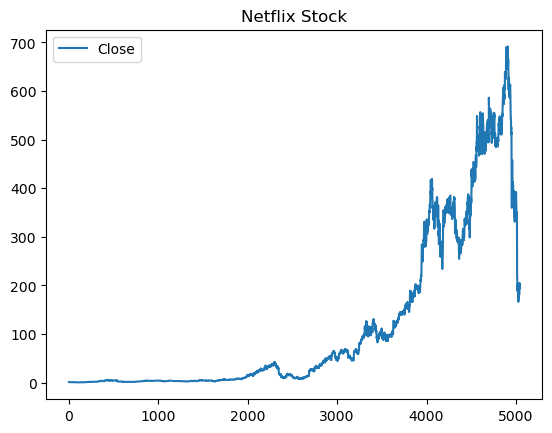

In [5]:
netflix.plot(y='Close',title = 'Netflix Stock')
plt.show()

In [6]:
netflix['RSI(2)'] = ta.rsi(netflix['Close'],length=2)
netflix['RSI(7)'] = ta.rsi(netflix['Close'],length=7)
netflix['RSI(14)'] = ta.rsi(netflix['Close'],length=14)
netflix['CCI(30)'] = ta.cci(close=netflix['Close'],length=30,high=netflix['High'],low=netflix['Low'])
netflix['CCI(50)'] = ta.cci(close=netflix['Close'],length=50,high=netflix['High'],low=netflix['Low'])
netflix['CCI(100)'] = ta.cci(close=netflix['Close'],length=100,high=netflix['High'],low=netflix['Low'])

,Date,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100)
99,2002-10-14,0.464286,0.535000,0.463571,0.534286,0.534286,5272400,78.982667,48.446850,40.124564,-91.769325,-136.494324,-175.581418
100,2002-10-15,0.542857,0.585714,0.542143,0.550000,0.550000,4125800,83.265890,50.928339,41.722116,-65.222688,-105.894193,-151.008498
101,2002-10-16,0.529286,0.532857,0.442857,0.459286,0.459286,5800200,24.833705,38.460169,35.786127,-92.386639,-135.789001,-178.763871
102,2002-10-17,0.472143,0.585714,0.471429,0.550000,0.550000,7481600,68.726426,52.132210,44.317691,-62.365604,-103.025609,-150.759888
103,2002-10-18,0.585714,0.735714,0.585714,0.682857,0.682857,24904600,88.461837,65.303309,53.964569,-1.711510,-42.084922,-94.914981


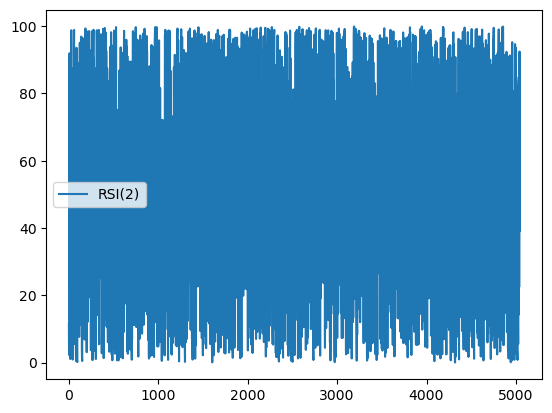

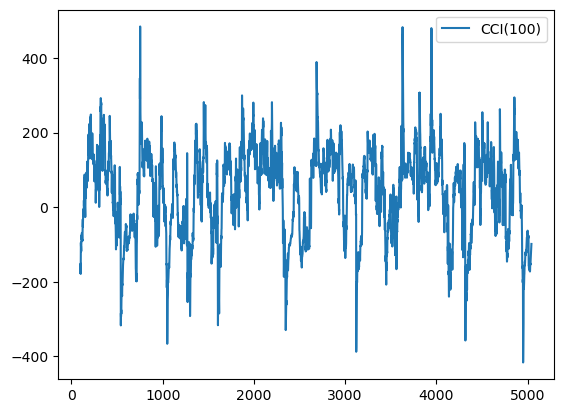

In [7]:
netflix.plot(y='RSI(2)')
netflix.plot(y='CCI(100)')
netflix = netflix.dropna()
netflix.head()

In [8]:
netflix['Label'] = np.where(netflix['Open'].shift(-2).gt(netflix['Open'].shift(-1)),"1","0")
netflix = netflix.dropna()
netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100),Label
99,2002-10-14,0.464286,0.535000,0.463571,0.534286,0.534286,5272400,78.982667,48.446850,40.124564,-91.769325,-136.494324,-175.581418,0
100,2002-10-15,0.542857,0.585714,0.542143,0.550000,0.550000,4125800,83.265890,50.928339,41.722116,-65.222688,-105.894193,-151.008498,0
101,2002-10-16,0.529286,0.532857,0.442857,0.459286,0.459286,5800200,24.833705,38.460169,35.786127,-92.386639,-135.789001,-178.763871,1
102,2002-10-17,0.472143,0.585714,0.471429,0.550000,0.550000,7481600,68.726426,52.132210,44.317691,-62.365604,-103.025609,-150.759888,1
103,2002-10-18,0.585714,0.735714,0.585714,0.682857,0.682857,24904600,88.461837,65.303309,53.964569,-1.711510,-42.084922,-94.914981,0


In [9]:
X = netflix[netflix.columns[6:-1]].values
y = netflix['Label'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter = 1000)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=1000)

In [12]:
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [13]:
print('Train Data Accuracy')
print(classification_report(y_train,predict_train))

Train Data Accuracy
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1239
           1       0.00      0.00      0.00      1233

    accuracy                           0.50      2472
   macro avg       0.25      0.50      0.33      2472
weighted avg       0.25      0.50      0.33      2472



In [14]:
print('Train Data Accuracy')
print(classification_report(y_test,predict_test))

Train Data Accuracy
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1222
           1       0.00      0.00      0.00      1251

    accuracy                           0.49      2473
   macro avg       0.25      0.50      0.33      2473
weighted avg       0.24      0.49      0.33      2473



[]

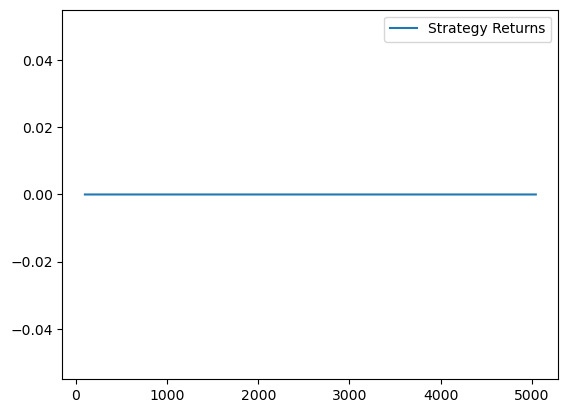

In [15]:
netflix['Prediction'] = np.append(predict_train,predict_test)
netflix['Strategy Returns'] = np.where( netflix['Prediction'].eq("1"),netflix['Open'].shift(-2)-netflix['Open'].shift(-1),0)

netflix['Strategy Returns'] = netflix['Strategy Returns'].cumsum() 

netflix.plot(y='Strategy Returns')
plt.plot()

In [16]:
prediction = netflix.iloc[-1]['Prediction'] 

if prediction=="1":
  print("Today's return forecast: UP")
else: 
  print("Today's return forecast: DOWN")

Today's return forecast: DOWN
